In [1]:
# Standard imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
import logomaker

# Insert path to mavenn beginning of path
import os
import sys
abs_path_to_mavenn = os.path.abspath('../../../')
sys.path.insert(0, abs_path_to_mavenn)

# Load mavenn
import mavenn
print(mavenn.__path__)

['/Users/jkinney/github/mavenn/mavenn']


In [2]:
# Load example data
data_df = mavenn.load_example_dataset('sortseq')

# Separate test from data_df
ix_test = data_df['set']=='test'
test_df = data_df[ix_test].reset_index(drop=True)
print(f'test N: {len(test_df):,}')

# Remove test data from data_df
data_df = data_df[~ix_test].reset_index(drop=True)
print(f'training + validation N: {len(data_df):,}')
data_df.head(10)

test N: 9,329
training + validation N: 36,449


,set,ct_0,ct_1,ct_2,ct_3,ct_4,ct_5,ct_6,ct_7,ct_8,ct_9,x
0,training,0,1,0,0,0,0,0,0,0,0,GGCTATACATTTTATGTTTCCGGGTCGTATTTTGTGTGG
1,training,0,0,0,0,0,0,0,0,1,0,GGCTTTACATTTTATGCTTCCTTCACGTATGTTGTGTCT
2,training,0,0,0,0,0,0,0,0,0,1,CGCTTTACACTTTCCGCTGCCGGCCCGTATTTTATGGGG
3,training,0,0,0,1,0,0,0,0,0,0,GGCTCTACCGTTTAGGCTTACGCCTCGAATATTGTGTGG
4,training,0,0,0,0,0,0,0,1,0,0,GGCTTTACACTTTACGCTTCCGTATCTTACGTTATGTGG
5,validation,0,0,0,0,0,0,2,0,0,0,GGATTTACACCATATGCCACCGGCTCATATGTTGTGCGG
6,validation,0,0,0,1,0,0,0,0,0,0,GGCTTTACACATCATGCTTCCGGCTCTTATGCCGTGATG
7,validation,2,0,0,0,0,0,0,0,0,0,GCCTTTAGAATTTATGTTTCCGTCACGTATGATGTGTAT
8,training,0,0,0,0,1,0,0,0,0,0,GGCTTTAAACTCTATGTTTCCGGCTCGTATGTTGTGTGG
9,training,0,0,0,1,0,0,0,0,0,0,GGCTTTCCACTTTATGCTTCCGGCTCTTATCTTGTGTGG


In [3]:
# Comptue sequence length and number of bins
L = len(data_df['x'][0])
y_cols = data_df.columns[1:-1]
Y = len(y_cols)
print(f'L={L}, Y={Y}')

L=39, Y=10


In [4]:
# Get sequence length
L = len(data_df['x'][0])

# Define model
model = mavenn.Model(regression_type='MPA',
                     L=L,
                     Y=Y,
                     alphabet='dna',
                     gpmap_type='blackbox',
                     gpmap_kwargs={
                         'hidden_layer_sizes': [5]*5
                     })

# Set training data
model.set_data(x=data_df['x'],
               y=data_df[y_cols],
               validation_flags=(data_df['set']=='validation'),
               shuffle=True)

# Fit model to data
history = model.fit(learning_rate=.0003,
                    epochs=1000,
                    batch_size=100,
                    early_stopping=True, 
                    early_stopping_patience=10,
                    linear_initialization=False)

N = 36,449 observations set as training data.
Using 24.8% for validation.
Data shuffled.
Time to set data: 0.579 sec.
Epoch 1/1000
275/275 [==============================] - 1s 4ms/step - loss: 355.8932 - I_like: -0.0017 - val_loss: 350.7778 - val_I_like: -9.1921e-04
Epoch 2/1000
275/275 [==============================] - 1s 3ms/step - loss: 347.8207 - I_like: 7.5125e-04 - val_loss: 342.9753 - val_I_like: 0.0048
Epoch 3/1000
275/275 [==============================] - 1s 3ms/step - loss: 330.5959 - I_like: 0.1186 - val_loss: 312.2011 - val_I_like: 0.2768
Epoch 4/1000
275/275 [==============================] - 1s 3ms/step - loss: 308.7653 - I_like: 0.2985 - val_loss: 303.1976 - val_I_like: 0.3215
Epoch 5/1000
275/275 [==============================] - 1s 3ms/step - loss: 302.2532 - I_like: 0.3199 - val_loss: 299.1561 - val_I_like: 0.3188
Epoch 6/1000
275/275 [==============================] - 1s 3ms/step - loss: 297.6979 - I_like: 0.3272 - val_loss: 294.8493 - val_I_like: 0.3274
Epoch 7/

Epoch 57/1000
275/275 [==============================] - 1s 2ms/step - loss: 277.1289 - I_like: 0.3602 - val_loss: 276.7652 - val_I_like: 0.3549
Epoch 58/1000
275/275 [==============================] - 1s 2ms/step - loss: 277.1525 - I_like: 0.3628 - val_loss: 276.7425 - val_I_like: 0.3547
Epoch 59/1000
275/275 [==============================] - 1s 2ms/step - loss: 277.0934 - I_like: 0.3630 - val_loss: 276.5011 - val_I_like: 0.3578
Epoch 60/1000
275/275 [==============================] - 1s 2ms/step - loss: 277.2282 - I_like: 0.3614 - val_loss: 276.5301 - val_I_like: 0.3569
Epoch 61/1000
275/275 [==============================] - 1s 2ms/step - loss: 277.0331 - I_like: 0.3638 - val_loss: 276.4755 - val_I_like: 0.3576
Epoch 62/1000
275/275 [==============================] - 1s 2ms/step - loss: 277.0808 - I_like: 0.3628 - val_loss: 278.0816 - val_I_like: 0.3391
Epoch 63/1000
275/275 [==============================] - 1s 3ms/step - loss: 277.0477 - I_like: 0.3628 - val_loss: 276.3979 - val_

In [5]:
# Save model
model.save('sortseq_mpa_blackbox')

Model saved to these files:
	sortseq_mpa_blackbox.pickle
	sortseq_mpa_blackbox.h5


In [6]:
# Load model
model = mavenn.load('sortseq_mpa_blackbox')

Model loaded from these files:
	sortseq_mpa_blackbox.pickle
	sortseq_mpa_blackbox.h5


On test data:
I_like_test: 0.338 +- 0.007 bits
I_pred_test: 0.540 +- 0.012 bits


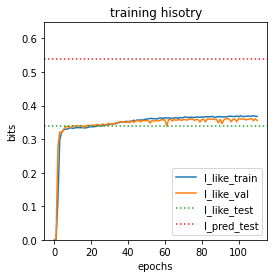

In [7]:
# Show training history
print('On test data:')
x_test = test_df['x'].values
y_test = test_df[y_cols].values

# Compute likelihood information
I_like, dI_like =  model.I_likelihood(x=x_test, y=y_test)
print(f'I_like_test: {I_like:.3f} +- {dI_like:.3f} bits') 

# Compute predictive information
I_pred, dI_pred = model.I_predictive(x=x_test, y=y_test)
print(f'I_pred_test: {I_pred:.3f} +- {dI_pred:.3f} bits')

I_like_hist = model.history['I_like']
val_I_like_hist = model.history['val_I_like']

fig, ax = plt.subplots(1,1,figsize=[4,4])
ax.plot(I_like_hist, label='I_like_train')
ax.plot(val_I_like_hist, label='I_like_val')
ax.axhline(I_like, color='C2', linestyle=':', label='I_like_test')
ax.axhline(I_pred, color='C3', linestyle=':', label='I_pred_test')
ax.legend()
ax.set_xlabel('epochs')
ax.set_ylabel('bits')
ax.set_title('training hisotry')
ax.set_ylim([0, I_pred*1.2]);

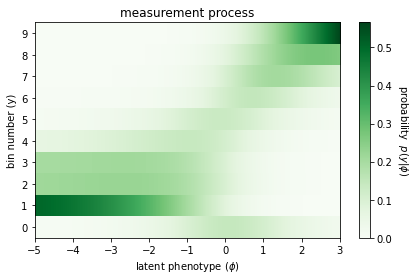

In [8]:
# Get G-P map parameters in matrix form
theta = model.get_theta(gauge='uniform')

# Create grid in phi space
phi_lim = [-5, 3]
phi_grid = np.linspace(phi_lim[0], phi_lim[1], 1000)

# Create array of allowable y values
Y = model.model.Y    # Y = number of bins
y_lim = [-.5, Y-.5]
y_all = range(Y)

# Compute matrix of p(y|phi) values
measurement_process = model.p_of_y_given_phi(y_all, phi_grid)

# Create figure with two panels
fig, ax = plt.subplots(1,1,figsize=[6,4])

im = ax.imshow(measurement_process,
               cmap='Greens',
               extent=phi_lim+y_lim,
               vmin=0,
               origin='lower',
               interpolation='nearest',
               aspect="auto")
ax.set_yticks(y_all)
ax.set_ylabel('bin number (y)')
ax.set_xlabel('latent phenotype ($\phi$)')
ax.set_title('measurement process')
cb = plt.colorbar(im)
cb.set_label('probability  $p(y|\phi)$', rotation=-90, va="bottom")

# Fix up plot
fig.tight_layout(w_pad=3)
fig.savefig('sortseq_mpa_visualization.png')
plt.show()

In [9]:
# Test simulate_data
sim_df = model.simulate_dataset(N=1000)
sim_df.head()

,set,phi,ct_0,ct_1,ct_2,ct_3,ct_4,ct_5,ct_6,ct_7,ct_8,ct_9,x
0,test,0.478486,1,0,0,0,0,0,0,0,0,0,GGCTTTACACTATATGCTTCCAGTTCGGATAATGTGTGG
1,training,-0.586747,0,0,0,0,0,0,1,0,0,0,GGCTTTAAAATTTATGCTTCCTGCTCCAATGTTGTGTGG
2,validation,-0.093416,1,0,0,0,0,0,0,0,0,0,GGCTTTTAAGTTTATGCTTCGGTCTCGAATGTTGTGTGT
3,test,0.195889,0,0,0,0,0,0,1,0,0,0,AGCTTGACACTTTATGCTTCCTGTTCGAATGTTGTGTGG
4,training,-0.260882,0,0,0,0,0,0,0,1,0,0,GTCTTTACACTTTATCTTTCCGGCTCTTATGTTGTGTGG
